<a href="https://colab.research.google.com/github/rakenputra/machine-learning/blob/main/UAS/Chapter%203/PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Raken Putra Athallah
# 1103204186

PyTorch Computer Vision merujuk pada penerapan dan penggunaan perpustakaan PyTorch untuk proyek-proyek di bidang visi komputer. Visi komputer adalah cabang dari kecerdasan buatan yang berkaitan dengan pengembangan algoritma dan model untuk memproses, menganalisis, dan memahami informasi visual dari dunia nyata. PyTorch, sebagai kerangka kerja machine learning, menyediakan banyak alat dan fungsionalitas yang mendukung pengembangan model visi komputer.

Beberapa fitur dan konsep kunci dalam PyTorch Computer Vision termasuk:

1. **TorchVision**: TorchVision adalah bagian dari ekosistem PyTorch yang menyediakan fungsi-fungsi dan dataset umum dalam visi komputer. Ini mencakup berbagai dataset standar, transformasi gambar, dan model pre-trained yang dapat digunakan untuk tugas-tugas visi komputer.

2. **Neural Networks for Vision**: PyTorch menyediakan modul `torch.nn` yang dapat digunakan untuk mendefinisikan dan melatih jaringan saraf untuk tugas-tugas visi komputer. Ini termasuk layer-layer khusus yang berguna untuk pengolahan citra seperti Convolutional Neural Networks (CNNs).

3. **Data Loaders dan Transforms**: PyTorch menyediakan utilitas untuk memuat data dalam batch (Data Loaders) dan melakukan transformasi data, termasuk transformasi gambar seperti rotasi, flip, dan normalisasi.

4. **Optimizers dan Loss Functions**: Modul `torch.optim` menyediakan berbagai optimisasi gradien dan PyTorch memiliki banyak fungsi kerugian (loss functions) bawaan yang sesuai untuk tugas-tugas visi komputer.

5. **Pre-trained Models**: PyTorch menyediakan akses ke sejumlah besar model pre-trained yang telah dilatih pada dataset besar seperti ImageNet. Ini memungkinkan pengguna untuk memanfaatkan pengetahuan yang telah diperoleh dari model-model tersebut untuk tugas-tugas spesifik.

6. **GPU Acceleration**: PyTorch memungkinkan pengguna untuk memanfaatkan GPU untuk pelatihan model secara efisien, yang sangat penting dalam tugas-tugas visi komputer yang seringkali melibatkan dataset gambar besar.

Dengan menggunakan fitur-fitur ini, pengembang dapat membangun, melatih, dan mengevaluasi model untuk berbagai aplikasi visi komputer seperti klasifikasi gambar, deteksi objek, segmentasi gambar, dan lainnya.

**Computer vision libraries in PyTorch**



1. **torchvision**: Ini adalah modul dalam PyTorch yang berisi berbagai macam fungsi, dataset, arsitektur model, dan transformasi gambar yang umumnya digunakan dalam masalah computer vision. Modul ini menyediakan alat yang berguna untuk membangun, melatih, dan mengevaluasi model computer vision.

2. **torchvision.datasets**: Modul ini berisi banyak contoh dataset computer vision untuk berbagai masalah, seperti klasifikasi gambar, deteksi objek, captioning gambar, klasifikasi video, dan lainnya. Selain itu, modul ini juga menyediakan serangkaian kelas dasar untuk membuat dataset kustom.

3. **torchvision.models**: Modul ini berisi arsitektur model computer vision yang telah terbukti dan umum digunakan yang diimplementasikan dalam PyTorch. Anda dapat menggunakan model-model ini sebagai dasar untuk menyelesaikan masalah spesifik Anda.

4. **torchvision.transforms**: Transformasi gambar seringkali diperlukan sebelum digunakan dengan model, seperti normalisasi, augmentasi, atau perubahan format. Transformasi gambar umum dapat ditemukan dalam modul ini, yang memungkinkan pengguna untuk memproses gambar sebelum disajikan kepada model.

5. **torch.utils.data.Dataset**: Ini adalah kelas dasar dataset untuk PyTorch. Ketika Anda ingin menggunakan dataset kustom Anda sendiri, Anda dapat membuat kelas yang menurunkan dari kelas ini dan mengimplementasikan metode-metodenya.

6. **torch.utils.data.DataLoader**: DataLoader menciptakan iterator Python di atas dataset (yang dibuat dengan torch.utils.data.Dataset). Iterator ini memungkinkan untuk secara efisien memuat dan mengambil batch data dari dataset saat melatih model, membantu dalam proses pelatihan yang efisien dan efektif.

In [6]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121


**Getting a dataset**

In [7]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15983445.76it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269335.95it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5011574.05it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7392083.87it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Kode tersebut merupakan pengaturan (setup) untuk mendapatkan data pelatihan (training data) dan data pengujian (testing data) dari FashionMNIST dataset menggunakan PyTorch. Dataset FashionMNIST merupakan dataset gambar pakaian yang umumnya digunakan untuk latihan dan pengujian model computer vision.

In [8]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

Kode ini bertujuan untuk menampilkan sampel pertama dari data pelatihan (`train_data`). Dengan menggunakan indeks `[0]` pada `train_data`, kita mendapatkan satu pasang gambar (image) dan label yang sesuai dari dataset FashionMNIST.

- Variabel `image` berisi tensor yang mewakili gambar pertama dari data pelatihan.
- Variabel `label` berisi label atau kategori yang sesuai dengan gambar pertama tersebut.

Dengan menjalankan kode ini, Anda dapat melihat struktur dan nilai-nilai pertama dari data pelatihan pada FashionMNIST.

**Input and output shapes of a computer vision model**

In [9]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [10]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [11]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

**Visualizing our data**

Image shape: torch.Size([1, 28, 28])


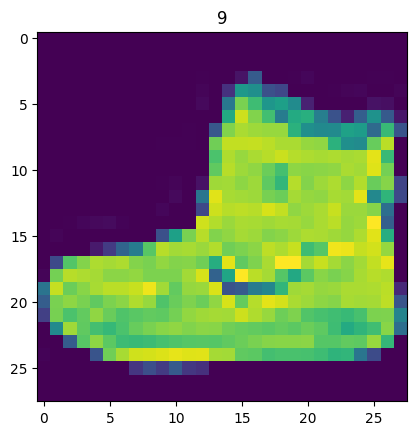

In [12]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

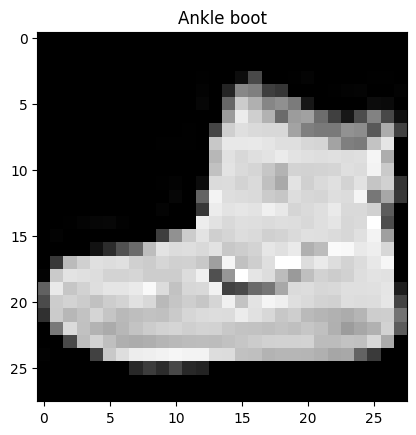

In [13]:
# We can turn the image into grayscale using the cmap parameter of plt.imshow().
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

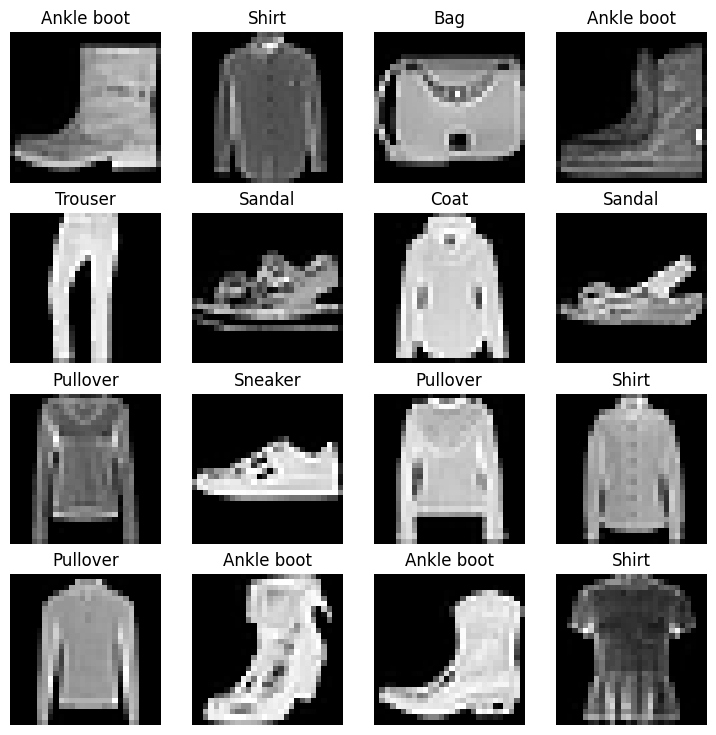

In [14]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

**Prepare DataLoader**
1. **DataLoader Purpose:**
   - `torch.utils.data.DataLoader` digunakan untuk memuat data ke dalam model, baik saat pelatihan maupun inferensi.

2. **Batches:**
   - DataLoader mengonversi dataset yang besar menjadi iterabel Python dari bagian-bagian kecil yang disebut batch atau mini-batch.
   - Batch size adalah parameter yang menentukan ukuran setiap batch atau mini-batch. Ini membantu dalam efisiensi komputasi.

3. **Computational Efficiency:**
   - Meskipun dalam dunia ideal kita dapat melakukan proses forward pass dan backward pass pada semua data sekaligus, tetapi untuk dataset yang besar, lebih efisien untuk memecahnya menjadi batch.

4. **Frequency of Gradient Descent:**
   - Dengan menggunakan mini-batches, gradient descent dilakukan lebih sering per epoch (satu kali per mini-batch daripada satu kali per epoch). Ini memberikan lebih banyak kesempatan bagi model untuk memperbarui parameter dan belajar lebih baik.

5. **Batch Size Selection:**
   - 32 seringkali menjadi nilai awal yang baik untuk batch size pada berbagai masalah.
   - Anda dapat mencoba berbagai nilai batch size sebagai hyperparameter, namun nilai yang sering digunakan adalah kelipatan dari 2 (misalnya, 32, 64, 128, 256, 512).

Pemilihan batch size yang sesuai dapat mempengaruhi kinerja pelatihan dan kecepatan konvergensi model. Proses pembuatan DataLoader membantu dalam menangani dataset besar dan mengatur pembelajaran mini-batch yang efisien.

In [15]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c84058613c0>, <torch.utils.data.dataloader.DataLoader object at 0x7c840589a5f0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


Kode di atas menunjukkan penggunaan DataLoader dalam PyTorch untuk menghasilkan iterables (iterable batches) dari dataset pelatihan dan pengujian. Berikut adalah beberapa penjelasan mengenai kode tersebut:

1. **Setup Batch Size:**
   - Batch size (BATCH_SIZE) diatur sebagai hyperparameter. Batch size menentukan jumlah sampel yang akan diproses dalam satu iterasi atau batch.

2. **DataLoader untuk Pelatihan dan Pengujian:**
   - `DataLoader` digunakan untuk mengonversi dataset pelatihan dan pengujian menjadi iterables (batches).
   - Dalam DataLoader, parameter `batch_size` menentukan berapa banyak sampel yang akan ada dalam setiap batch.
   - Untuk pelatihan (`train_dataloader`), data diacak (`shuffle=True`), sementara untuk pengujian (`test_dataloader`), data tidak diacak (`shuffle=False`).

3. **Hasil Pemeriksaan:**
   - Mencetak dataloaders dan panjangnya untuk pelatihan dan pengujian.
   - Dengan BATCH_SIZE sebesar 32, panjang dataloader menunjukkan berapa banyak batch yang akan digunakan dalam satu epoch.

Kode ini menyiapkan dataloaders yang siap untuk digunakan dalam pelatihan dan pengujian model. DataLoader membantu mempermudah proses pemuatan dan pengolahan data dalam batch, yang merupakan pendekatan efisien untuk melatih model pada dataset yang besar.

In [16]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Pada kode di atas, kita menggunakan `iter(train_dataloader)` untuk membuat iterator dari dataloader pelatihan, dan kemudian menggunakan `next(...)` untuk mendapatkan satu batch pertama dari dataloader. Fungsi `next(...)` mengambil elemen berikutnya dari iterator.
1. `iter(train_dataloader)`: Mengubah dataloader pelatihan menjadi iterator, sehingga kita dapat menggunakan `next(...)` untuk mendapatkan batch-batch berikutnya.

2. `next(iter(train_dataloader))`: Mengambil batch pertama dari dataloader pelatihan. Batch ini terdiri dari dua elemen, yaitu `train_features_batch` (fitur) dan `train_labels_batch` (label).

3. `train_features_batch.shape, train_labels_batch.shape`: Mencetak bentuk (shape) dari fitur dan label dalam batch tersebut.

Hasilnya memberikan informasi tentang bentuk (shape) dari batch pertama dalam dataloader pelatihan, yang mencakup bentuk fitur dan label. Dalam kasus ini, kita dapat melihat berapa banyak sampel dalam satu batch dan berapa banyak fitur untuk setiap sampel, serta bentuk dari labelnya.

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


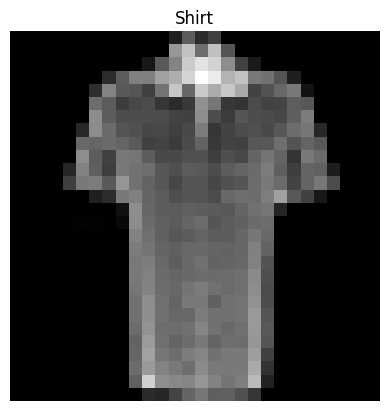

In [17]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

**Model 0: Build a baseline model**

In [18]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


Pada kode di atas, kita menggunakan `nn.Flatten()` untuk membuat lapisan (layer) yang dapat meratakan (flatten) input. Ini adalah salah satu cara untuk mempersiapkan data sebelum dimasukkan ke dalam lapisan-lapisan (layer) lain dari model.
1. `flatten_model = nn.Flatten()`: Membuat instance dari `nn.Flatten()` yang merupakan lapisan (layer) yang akan meratakan inputnya.

2. `x = train_features_batch[0]`: Mengambil satu sampel pertama dari batch pelatihan untuk digunakan sebagai contoh input.

3. `output = flatten_model(x)`: Melakukan proses forward pass (propagasi maju) dengan memberikan sampel input ke `flatten_model`. Ini akan meratakan input.

4. `print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")`: Mencetak bentuk (shape) dari sampel sebelum dilakukan flattening. Ini memberikan informasi tentang bentuk asli dari data gambar sebelum diratakan.

5. `print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")`: Mencetak bentuk (shape) dari output setelah dilakukan flattening. Ini memberikan informasi tentang bentuk data setelah diratakan.

Perhatikan bahwa `nn.Flatten()` meratakan inputnya tanpa mengubah nilai-nilai dalam data tersebut, dan outputnya menjadi data 1D. Ini berguna saat kita ingin menghubungkan lapisan-lapisan (layer) linear di dalam model kita.

In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

Kode di atas mendefinisikan model untuk klasifikasi gambar menggunakan PyTorch. Berikut penjelasan komponennya:

1. `class FashionMNISTModelV0(nn.Module)`: Mendefinisikan kelas model yang merupakan subkelas dari `nn.Module`, yang merupakan dasar untuk semua model PyTorch.

2. `def __init__(self, input_shape: int, hidden_units: int, output_shape: int)`: Konstruktor untuk inisialisasi model. Menerima tiga parameter: `input_shape` (jumlah fitur dalam satu sampel), `hidden_units` (jumlah unit dalam lapisan tersembunyi), dan `output_shape` (jumlah kelas untuk output).

3. `super().__init__()`: Memanggil konstruktor kelas induk (`nn.Module`) untuk melakukan inisialisasi yang diperlukan.

4. `self.layer_stack`: Membuat rangkaian lapisan (layer) yang terdiri dari tiga lapisan:
   - `nn.Flatten()`: Lapisan yang meratakan inputnya. Berguna untuk mengubah input 2D (seperti gambar) menjadi vektor 1D.
   - `nn.Linear(in_features=input_shape, out_features=hidden_units)`: Lapisan linear dengan jumlah input sesuai dengan `input_shape` dan jumlah output (neuron) sesuai dengan `hidden_units`.
   - `nn.Linear(in_features=hidden_units, out_features=output_shape)`: Lapisan linear untuk menghasilkan output dengan jumlah kelas sesuai dengan `output_shape`.

5. `def forward(self, x)`: Metode `forward` yang mendefinisikan cara model melakukan forward pass. `x` adalah input ke model, dan fungsi ini akan mengembalikan output setelah melewati semua lapisan.

Model ini cocok digunakan untuk klasifikasi FashionMNIST, di mana gambar dianggap sebagai vektor piksel dan ingin dipetakan ke dalam kelas-kelas pakaian yang berbeda.

In [20]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

Pada kode di atas, Kita mengatur seed untuk random number generator PyTorch dengan `torch.manual_seed(42)`. Ini bertujuan agar hasil yang dihasilkan oleh operasi acak (seperti inisialisasi bobot model) menjadi konsisten setiap kali kode dijalankan.

Selanjutnya, Kita membuat instance dari model `FashionMNISTModelV0` dengan menyediakan parameter input seperti `input_shape` (jumlah fitur dalam satu sampel), `hidden_units` (jumlah unit dalam lapisan tersembunyi), dan `output_shape` (jumlah kelas untuk output). Model ini diinisialisasi dengan arsitektur yang telah Kita tentukan sebelumnya.

Terakhir, Kita memindahkan model ke CPU menggunakan `model_0.to("cpu")`. Ini berarti operasi komputasi model akan dilakukan pada CPU. Jika Kita memiliki GPU dan ingin menggunakan GPU untuk perhitungan, Kita dapat menggunakan `model_0.to("cuda")` (jika GPU tersedia dan terkonfigurasi dengan baik).

**Setup loss, optimizer and evaluation metrics**

In [21]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [22]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

**Creating a function to time our experiments**

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

Kode di atas mendefinisikan fungsi `print_train_time` yang digunakan untuk mencetak waktu yang dibutuhkan untuk melatih model. Fungsi ini menerima tiga parameter:

1. `start`: Waktu mulai komputasi (dalam format timeit).
2. `end`: Waktu akhir komputasi.
3. `device` (opsional): Perangkat tempat komputasi berlangsung (misalnya, "cpu" atau "cuda"). Secara default, nilainya adalah `None`.

Fungsi ini mencetak waktu total yang dibutuhkan untuk melatih model dengan presisi hingga tiga desimal. Kemudian, fungsi mengembalikan total waktu dalam detik.

Penggunaan umumnya akan terlihat seperti ini:

```python
start_time = timer()
# ... operasi pelatihan model ...
end_time = timer()
print_train_time(start_time, end_time, device="cuda")
```

Anda dapat menyertakan perangkat (`device`) di mana komputasi dilakukan untuk melacak apakah pelatihan dilakukan di CPU atau GPU.

**Creating a training loop and training a model on batches of data**

In [24]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 28.711 seconds


Kode di atas merupakan bagian dari proses pelatihan dan evaluasi model menggunakan data loader dan model yang telah dibuat sebelumnya. Berikut adalah penjelasan singkatnya:

1. **Import tqdm for progress bar**: Mengimpor modul `tqdm` untuk menampilkan bar kemajuan selama pelatihan.

2. **Set the seed and start the timer**: Mengatur seed untuk reproduktibilitas dan memulai timer untuk mengukur waktu pelatihan.

3. **Set the number of epochs (we'll keep this small for faster training times)**: Menetapkan jumlah epoch untuk melatih model. Pada contoh ini, jumlah epoch diatur ke 3.

4. **Create training and testing loop**: Looping melalui epoch untuk melakukan pelatihan dan evaluasi pada setiap epoch.

   a. **Training Loop**:
      - `model_0.train()`: Mengatur model ke mode pelatihan.
      - Looping melalui setiap batch dalam data pelatihan menggunakan data loader.
      - Forward pass, perhitungan loss, dan optimasi dilakukan untuk setiap batch.
      - Mengakumulasi loss total selama satu epoch.
      - Print status kemajuan setiap 400 batch.
   
   b. **Testing Loop**:
      - Mengatur model ke mode evaluasi (`model_0.eval()`).
      - Looping melalui setiap batch dalam data pengujian menggunakan data loader.
      - Mengakumulasi loss dan akurasi total selama satu epoch.
      - Perhitungan metrik pengujian (loss dan akurasi) dilakukan di dalam `torch.inference_mode()`.
   
   c. **Print out what's happening**: Mencetak loss dan akurasi pelatihan serta pengujian setelah setiap epoch.

5. **Calculate training time**: Menghitung total waktu pelatihan dari awal hingga akhir epoch.

Perhatikan bahwa penjelasan ini hanya mencakup sebagian dari seluruh code snippet yang diberikan. Seluruh code snippet terkait dengan pelatihan dan evaluasi model pada dataset FashionMNIST.

**Make predictions and get Model 0 results**

In [25]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

**Setup device agnostic-code (for using a GPU if there is one)**

In [26]:
#Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

**Model 1: Building a better model with non-linearity**

In [27]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

Kode di atas mendefinisikan arsitektur model FashionMNISTModelV1 menggunakan modul PyTorch (`nn.Module`). Berikut adalah penjelasan singkatnya:

1. **Create a model with non-linear and linear layers**: Membuat kelas model `FashionMNISTModelV1` yang merupakan turunan dari `nn.Module`.
   - `__init__`: Konstruktor inisialisasi model dengan lapisan-lapisan yang dibutuhkan.
      - `nn.Flatten()`: Meratakan input menjadi vektor tunggal.
      - `nn.Linear`: Lapisan linear yang mengubah dimensi input.
      - `nn.ReLU()`: Fungsi aktivasi ReLU yang menambahkan non-linearitas.
   - `forward`: Metode ini mendefinisikan proses forward pass model, yaitu bagaimana input diteruskan melalui setiap lapisan.

Arsitektur model ini terdiri dari lapisan-lapisan linear dan non-linear (ReLU). Input pertama kali diratakan menjadi vektor tunggal menggunakan `nn.Flatten()`, kemudian melewati lapisan linear pertama diikuti oleh fungsi aktivasi ReLU, lapisan linear kedua, dan ReLU lagi sebelum keluaran akhir.

Model ini dirancang untuk melakukan klasifikasi pada dataset FashionMNIST, dengan jumlah unit tersembunyi (`hidden_units`) dan jumlah kelas output (`output_shape`) sebagai parameter konfigurasi.

In [28]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)


1. **torch.manual_seed(42)**: Mengatur seed untuk generator angka acak PyTorch, memberikan reproduktibilitas pada pelatihan model.

2. **model_1 = FashionMNISTModelV1(...).to(device)**: Membuat instance dari model `FashionMNISTModelV1` dengan mengonfigurasi parameter seperti `input_shape`, `hidden_units`, dan `output_shape`. Kemudian, model tersebut dipindahkan ke perangkat (`device`), yang dapat menjadi GPU atau CPU, tergantung pada ketersediaan GPU.

3. **next(model_1.parameters()).device**: Memeriksa perangkat di mana parameter pertama dari model berada. Ini memberikan informasi tentang perangkat di mana model berjalan (GPU atau CPU).

Secara keseluruhan, langkah-langkah ini bertujuan untuk mendemonstrasikan cara membuat model, mengonfigurasi parameter arsitektur, dan memastikan model berjalan pada perangkat yang diinginkan (dalam hal ini, GPU jika tersedia).

**Setup loss, optimizer and evaluation metrics**

In [29]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)



1. **from helper_functions import accuracy_fn**: Mengimpor fungsi `accuracy_fn` dari modul `helper_functions`. Fungsi ini mungkin berisi implementasi untuk menghitung akurasi dari prediksi model.

2. **loss_fn = nn.CrossEntropyLoss()**: Membuat objek fungsi kerugian (loss function) menggunakan `CrossEntropyLoss`. Loss function ini umumnya digunakan untuk tugas klasifikasi multikelas, seperti pada kasus dataset FashionMNIST ini.

3. **optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)**: Membuat objek optimizer Stochastic Gradient Descent (SGD) yang akan digunakan untuk mengoptimalkan parameter model selama pelatihan. Optimizer ini diberi tahu untuk mengoptimalkan parameter dari `model_1`. Nilai `lr=0.1` menentukan laju pembelajaran (learning rate) yang digunakan oleh optimizer.

**unctionizing training and test loops**

In [30]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [31]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 34.721 seconds


In [32]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code
model_1_results = eval_model(model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_1_results

RuntimeError: ignored

Pesan kesalahan tersebut menyatakan bahwa terdapat perbedaan perangkat (device) antara tensor yang digunakan dalam evaluasi model. Lebih spesifiknya, ada tensor yang berada di GPU (cuda:0) dan tensor yang berada di CPU, yang menyebabkan kesalahan tersebut.

Solusinya adalah untuk memastikan bahwa semua tensor yang terlibat dalam evaluasi model berada di perangkat yang sama. Kode yang tidak bergantung pada perangkat (device-agnostic) biasanya memastikan bahwa ini tidak terjadi, tetapi tampaknya fungsi `eval_model()` belum diperbarui untuk mendukung hal ini.

Solusi yang diajukan adalah dengan menambahkan parameter `device` ke fungsi `eval_model()` dan memastikan bahwa semua operasi evaluasi dilakukan di perangkat yang sesuai.

Setelah perubahan tersebut dilakukan, kita akan mencoba menjalankan ulang perhitungan untuk melihat apakah kesalahan tersebut teratasi.

In [33]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

Kode di atas merupakan definisi dari fungsi `eval_model()`. Fungsi ini dirancang untuk mengevaluasi kinerja model pada suatu dataset dengan menghitung nilai loss dan akurasi model. Beberapa poin penting dalam fungsi ini:

- Fungsi ini menerima model PyTorch, dataloader, fungsi loss, fungsi akurasi, dan parameter opsional `device` sebagai input.
- Model diterapkan pada mode evaluasi menggunakan `model.eval()`.
- Loop dilakukan untuk setiap batch dalam dataloader, dan data serta label dikirimkan ke perangkat yang ditentukan oleh parameter `device`.
- Hasil prediksi model (`y_pred`) dan label sebenarnya (`y`) digunakan untuk menghitung loss dan akurasi.
- Akhirnya, nilai loss dan akurasi diukur untuk dataset yang diberikan, dan hasilnya dikembalikan dalam bentuk dictionary.

Setelah fungsi ini didefinisikan, kita mencoba menghitung hasil evaluasi untuk `model_1` menggunakan dataloader `test_dataloader` dan fungsi-fungsi loss dan akurasi yang telah ditentukan sebelumnya. Hasilnya disimpan dalam bentuk dictionary `model_1_results`.

In [34]:
# Check baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

**Model 2: Building a Convolutional Neural Network (CNN)**

In [35]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Kode di atas mendefinisikan arsitektur model Convolutional Neural Network (CNN) untuk dataset FashionMNIST. Beberapa poin penting dari `FashionMNISTModelV2`:

- Model ini memiliki dua blok konvolusional (`block_1` dan `block_2`) yang terdiri dari lapisan konvolusi, fungsi aktivasi ReLU, dan lapisan max pooling.
- Setelah blok konvolusional, ada lapisan pengklasifikasi (`classifier`) yang berisi lapisan flatten dan lapisan linear untuk menghubungkan output ke kelas target.
- Blok konvolusional pertama (`block_1`) mengambil input gambar dengan satu saluran warna (grayscale).
- Fungsi `forward` model menghubungkan input melalui kedua blok konvolusional dan lapisan pengklasifikasi, menghasilkan output prediksi.

Model ini didesain untuk dataset FashionMNIST, dan input pertama (`input_shape=1`) menunjukkan bahwa gambar dalam dataset ini memiliki satu saluran warna (grayscale). Jumlah `hidden_units` dan `output_shape` dapat disesuaikan sesuai kebutuhan.

Setelah model didefinisikan, model tersebut dipindahkan ke perangkat yang sesuai (`device`).

**Stepping through nn.Conv2d()**

In [36]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Kode di atas membuat tensor berukuran (32, 3, 64, 64), yang menunjukkan batch gambar sebanyak 32 dengan tiga saluran warna (RGB) dan resolusi 64x64 piksel. Sebagai informasi:

- `batch_size`: Jumlah gambar dalam satu batch, dalam hal ini 32.
- `color_channels`: Jumlah saluran warna dalam setiap gambar, dalam hal ini 3 (mewakili RGB).
- `height` dan `width`: Resolusi gambar, dalam hal ini 64x64 piksel.

Selanjutnya, kode mencetak bentuk batch gambar dan bentuk satu gambar dari batch tersebut (diambil sebagai `test_image`). Kemudian, nilai piksel dari satu gambar dicetak untuk memberikan gambaran tentang struktur data tensor gambar.

In [37]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

Kode di atas membuat lapisan konvolusional menggunakan `nn.Conv2d` dengan parameter tertentu, seperti jumlah saluran masukan (`in_channels`), jumlah saluran keluaran (`out_channels`), ukuran kernel (`kernel_size`), langkah (`stride`), dan pembatasan (`padding`). Selanjutnya, data gambar (`test_image`) diteruskan melalui lapisan konvolusional tersebut.

Perlu diperhatikan bahwa di PyTorch versi kurang dari 1.11.0, perintah ini mungkin menghasilkan galat karena masalah bentuk (nn.Conv2d() mengharapkan tensor 4D sebagai masukan). Meskipun demikian, pada PyTorch versi yang lebih baru, operasi tersebut dapat berjalan dengan baik.

In [38]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [39]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [40]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

Kode di atas membuat lapisan konvolusional baru (`conv_layer_2`) dengan parameter yang berbeda. Gambar tunggal (`test_image`) kemudian diteruskan melalui lapisan konvolusional tersebut dengan menggunakan metode `forward()` dari `nn.Conv2d`. Hasil dari operasi ini adalah bentuk (shape) dari keluaran yang dihasilkan oleh lapisan konvolusional tersebut.

Penting untuk mencatat bahwa kita menggunakan `test_image.unsqueeze(dim=0)` untuk menambahkan dimensi batch ke gambar tunggal tersebut. Dalam praktiknya, data gambar biasanya berbentuk batch, dan dimensi batch tersebut sudah ada sejak awal. Namun, karena kita hanya menggunakan satu gambar sebagai contoh, kita perlu menambahkan dimensi batch agar sesuai dengan ekspektasi model konvolusional.

In [41]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [42]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


Kode di atas mencetak bentuk (shape) dari tensor bobot (`weight`) dan tensor bias (`bias`) yang ada dalam lapisan konvolusional `conv_layer_2`. Berikut adalah penjelasan singkat dari masing-masing:

1. **Bobot (`weight`)**
   - Bentuk: `[out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]`
   - Penjelasan: Bobot pada lapisan konvolusional menangkap pola dan fitur pada data gambar. Dalam hal ini, terdapat 10 filter (out_channels) dengan dimensi kernel masing-masing 5x5. Jumlah saluran warna pada input adalah 3 (in_channels).

2. **Bias (`bias`)**
   - Bentuk: `[out_channels=10]`
   - Penjelasan: Setiap saluran dalam lapisan konvolusional memiliki satu nilai bias. Jumlah saluran tersebut adalah 10 (out_channels). Bias memberikan model fleksibilitas untuk menyesuaikan keluaran dari setiap saluran.

**Stepping through nn.MaxPool2d()**

In [43]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


Kode di atas mencetak bentuk (shape) dari citra uji sebelum dan setelah dimensi unsqueezed, serta bentuk setelah melewati lapisan konvolusi (`conv_layer`) dan lapisan max pooling (`max_pool_layer`). Berikut adalah penjelasan singkat dari setiap langkah:

1. **Citra Uji Asli**
   - Bentuk: `(3, 64, 64)`
   - Penjelasan: Citra uji memiliki tiga saluran warna (RGB) dan ukuran 64x64 piksel.

2. **Citra Uji dengan Dimensi Unsqueezed**
   - Bentuk: `(1, 3, 64, 64)`
   - Penjelasan: Dengan menambahkan dimensi unsqueezed, citra uji menjadi tensor dengan batch size 1.

3. **Setelah Melewati Lapisan Konvolusi (`conv_layer`)**
   - Bentuk: `(1, 10, 62, 62)`
   - Penjelasan: Citra uji, setelah melewati lapisan konvolusi, mengalami perubahan dimensi. Terdapat 10 saluran keluaran (output channels) dengan ukuran 62x62 piksel.

4. **Setelah Melewati Lapisan Max Pooling (`max_pool_layer`)**
   - Bentuk: `(1, 10, 31, 31)`
   - Penjelasan: Max pooling mengurangkan dimensi citra uji setelah konvolusi. Kernel dengan ukuran 2x2 digunakan untuk mengambil nilai maksimum dari setiap jendela 2x2 pada setiap saluran. Sehingga, ukuran citra setelah max pooling menjadi setengah dari ukuran awalnya.

In [44]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Kode di atas menciptakan tensor acak dengan dimensi `(1, 1, 2, 2)` dan mengaplikasikan lapisan max pooling (`max_pool_layer`) dengan ukuran kernel 2x2. Berikut adalah penjelasan singkat:

1. **Tensor Acak**
   - Isi: Tensor acak dihasilkan menggunakan fungsi `torch.randn`.
   - Bentuk: `(1, 1, 2, 2)`
   - Penjelasan: Tensor acak ini memiliki dimensi batch size 1, satu saluran warna, dan ukuran 2x2.

2. **Lapisan Max Pooling**
   - Isi: Nilai maksimum dari setiap jendela 2x2 diambil dari tensor acak.
   - Bentuk: `(1, 1, 1, 1)`
   - Penjelasan: Hasil dari lapisan max pooling adalah tensor dengan dimensi yang lebih rendah, yaitu `(1, 1, 1, 1)`. Nilai ini merupakan nilai maksimum dari tensor acak original.

Anda dapat mencoba mengganti nilai `kernel_size` pada lapisan max pooling dan melihat bagaimana itu memengaruhi hasilnya.

**Setup a loss function and optimizer for model_2**

In [45]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

**Training and testing model_2 using our training and test functions**

In [46]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59623 | Train accuracy: 78.44%
Test loss: 0.39509 | Test accuracy: 85.90%

Epoch: 1
---------
Train loss: 0.36114 | Train accuracy: 87.07%
Test loss: 0.35184 | Test accuracy: 86.99%

Epoch: 2
---------
Train loss: 0.32347 | Train accuracy: 88.25%
Test loss: 0.32852 | Test accuracy: 88.04%

Train time on cuda: 39.927 seconds


In [47]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32851800322532654,
 'model_acc': 88.03913738019169}

**Compare model results and training time**

In [48]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.328518,88.039137


In [49]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,28.710748
1,FashionMNISTModelV1,0.685001,75.019968,34.721093
2,FashionMNISTModelV2,0.328518,88.039137,39.927219


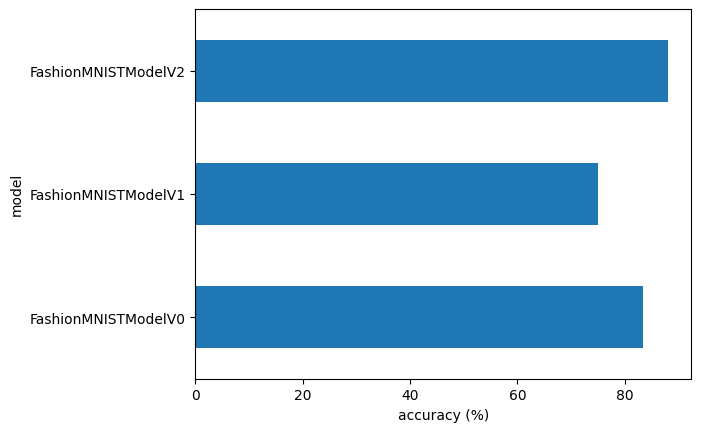

In [50]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

**Make and evaluate random predictions with best model**

In [51]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

Fungsi `make_predictions` di atas digunakan untuk membuat prediksi menggunakan model pada data tertentu. Berikut adalah penjelasan langkah-langkahnya:

1. **Input Parameters**:
   - `model`: Model PyTorch yang akan digunakan untuk membuat prediksi.
   - `data`: Daftar sampel data yang akan diprediksi.
   - `device`: Perangkat tempat model berjalan, nilai defaultnya adalah perangkat yang digunakan sebelumnya (`device`).

2. **Proses Prediksi**:
   - Fungsi melakukan iterasi melalui setiap sampel dalam data.
   - Setiap sampel disiapkan dengan menambahkan dimensi tambahan dan dikirim ke perangkat yang ditentukan.
   - Dilakukan _forward pass_ menggunakan model untuk mendapatkan nilai _logit_ (keluaran model sebelum fungsi aktivasi).
   - _Logit_ diubah menjadi probabilitas prediksi menggunakan fungsi softmax pada dimensi "logit".
   - Probabilitas prediksi ditambahkan ke daftar `pred_probs`.

3. **Output**:
   - Fungsi mengembalikan tensor yang berisi probabilitas prediksi dari setiap sampel dalam data.

Cara penggunaannya adalah dengan memasukkan model dan data yang ingin diprediksi. Output dari fungsi ini adalah tensor probabilitas prediksi untuk setiap sampel dalam data.

In [52]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [53]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.0998e-07, 1.5746e-08, 8.2057e-08, 2.4316e-07, 1.4378e-08, 9.9991e-01,
         2.5772e-07, 4.9176e-06, 2.5082e-05, 5.6981e-05],
        [3.0544e-02, 7.2943e-01, 1.5157e-03, 2.5510e-02, 1.1955e-01, 3.5390e-04,
         9.2778e-02, 6.9937e-05, 5.3350e-05, 1.9566e-04]])

In [54]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [55]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

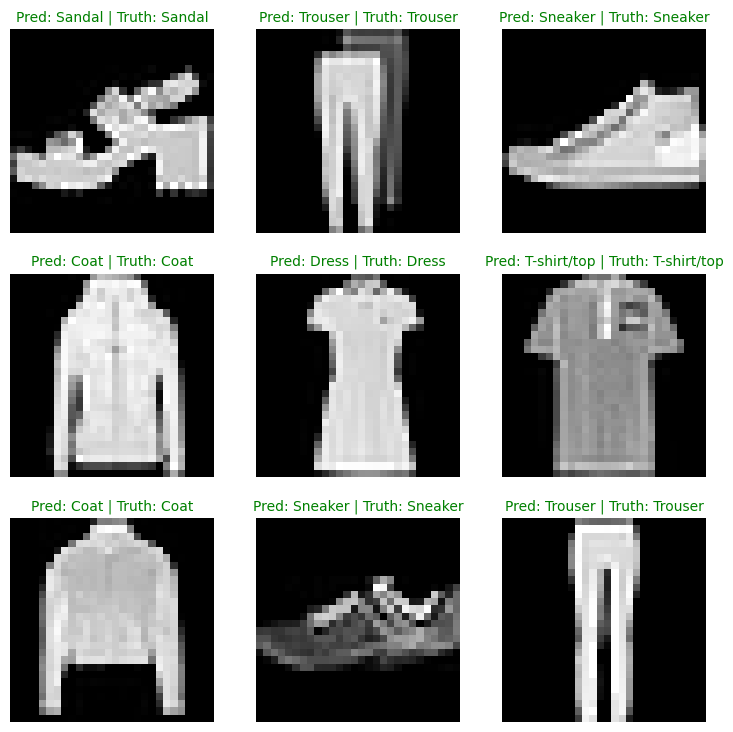

In [56]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

**Making a confusion matrix for further prediction evaluation**

In [57]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [58]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.2 MB/s eta 0:00:00
mlxtend version: 0.23.0


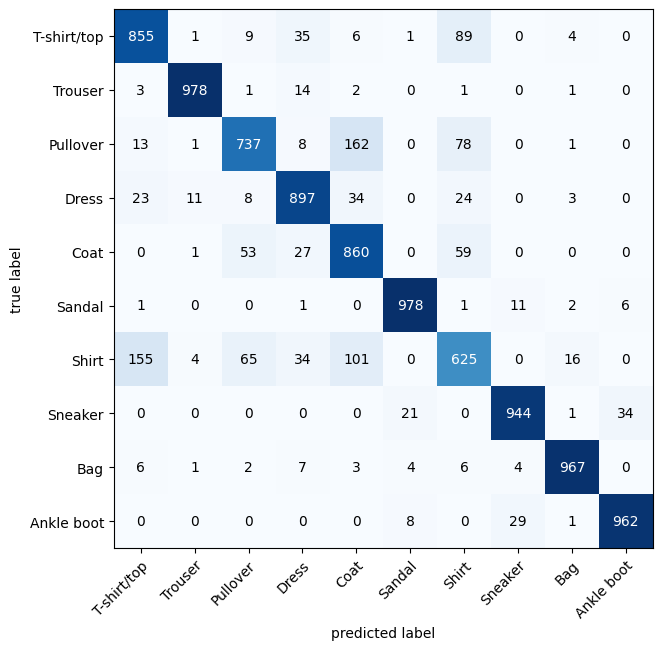

In [59]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

**Save and load best performing model**

In [60]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [61]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [62]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32851800322532654,
 'model_acc': 88.03913738019169}

In [63]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32851800322532654,
 'model_acc': 88.03913738019169}

In [64]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)